#### IMPORT

In [1]:
import os, platform

from IPython.display import clear_output
import warnings
warnings.filterwarnings('ignore')

import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import tensorflow as tf

from sklearn.preprocessing import LabelBinarizer
from sklearn.model_selection import train_test_split

from matplotlib import pyplot


from keras.utils.np_utils import to_categorical 
from tensorflow.keras.callbacks import EarlyStopping
from keras.models import Sequential
from keras.layers import Dense, Dropout, \
    BatchNormalization, Flatten, LSTM
# from scikeras.wrappers import KerasClassifier
from keras.wrappers.scikit_learn import KerasClassifier
from keras.models import load_model

from sklearn.preprocessing import MinMaxScaler

from sklearn.model_selection import cross_val_score
from sklearn.model_selection import KFold
from sklearn.metrics import accuracy_score, confusion_matrix
from sklearn.metrics import roc_curve, roc_auc_score, auc


from sklearn.metrics import roc_curve, auc

from itertools import cycle
from scipy import interp
from scipy.optimize import brentq
from scipy.interpolate import interp1d

#### PARAMETERS
- Set the condition
> * N_FEATURES: Number of Features
> * CHECK_BLANKS: Check for blank data. If any blank data is found, the whole row of data will be deleted.
> * CHECK_CLASS_IMBALANCE: Check for dataset class imbalance. The more balance the dataset, the less biases the model will be.

In [23]:
##############################
# # deep learning features # #
##############################
SEED = 1005 # random seed for reproducibility

# should make this dynamic
N_FEATURES = 220 #36 #220 #9 #220 #36 #36 #120 #220
# N_CLASSES= 12
TIMESTEPS = 1
EPOCH=300
BATCH_SIZE=10

###############
# # dataset # #
###############
DATASET_DIR_NAME = "dataset\set04\\11_same"
# SAMPLE_DATASET_NAME = "own_train_full" + ".csv"
# ACTUAL_DATASET_NAME = "own_test_full" + ".csv"

# ACTUAL_DATASET_NAME = "combi_andy_full" + ".csv"
# ACTUAL_DATASET_NAME = "combi_azfar_full" + ".csv"
# ACTUAL_DATASET_NAME = "combi_bryce_full" + ".csv"
# ACTUAL_DATASET_NAME = "combi_chris_full" + ".csv"
# ACTUAL_DATASET_NAME = "combi_cy_full" + ".csv"
# ACTUAL_DATASET_NAME = "combi_gerald_full" + ".csv"
# ACTUAL_DATASET_NAME = "combi_ken_full" + ".csv"
# ACTUAL_DATASET_NAME = "combi_sz_full" + ".csv" #notdone
# ACTUAL_DATASET_NAME = "combi_vale_full" + ".csv"
# ACTUAL_DATASET_NAME = "combi_ye_full" + ".csv"  #notdone
# ACTUAL_DATASET_NAME = "combi_ys_full" + ".csv" #notdone

# SAMPLE_DATASET_NAME = "own_train_semi" + ".csv"
# ACTUAL_DATASET_NAME = "own_test_semi" + ".csv"
# SAMPLE_DATASET_NAME = "own_train_bare" + ".csv"
# ACTUAL_DATASET_NAME = "own_test_bare" + ".csv"
# SAMPLE_DATASET_NAME = "own_train_5" + ".csv"
# ACTUAL_DATASET_NAME = "own_test_5" + ".csv"
SAMPLE_DATASET_NAME = "same_train" + ".csv"
ACTUAL_DATASET_NAME = "same_test" + ".csv"
# SAMPLE_DATASET_NAME = "same_train_semi" + ".csv"
# ACTUAL_DATASET_NAME = "same_test_semi" + ".csv"
# SAMPLE_DATASET_NAME = "same_train_bare" + ".csv"
# ACTUAL_DATASET_NAME = "same_test_bare" + ".csv"
# SAMPLE_DATASET_NAME = "same_train_5" + ".csv"
# ACTUAL_DATASET_NAME = "same_test_5" + ".csv"


MODEL_DIR_NAME = "model"
MODEL_NAME = "same_full_model_del" + ".h5"
RESULT_NAME = "same_full_del" + ".csv"

# MODEL_DIR_NAME = "dataset\set04\\11_same"
# MODEL_NAME = "model_" + "set04_11_same.h5"
# RESULT_NAME = "same_full_del_1" + ".csv"

DATASET_DIR_PATH = os.path.join(os.getcwd(), DATASET_DIR_NAME)
SAMPLE_DATASET_PATH = os.path.join(DATASET_DIR_PATH, SAMPLE_DATASET_NAME)
ACTUAL_DATASET_PATH = os.path.join(DATASET_DIR_PATH, ACTUAL_DATASET_NAME)

MODEL_DIR_PATH = os.path.join(os.getcwd(), MODEL_DIR_NAME)
MODEL_PATH = os.path.join(MODEL_DIR_PATH, MODEL_NAME)

CLASSES_COL_NAME = "Subject"
CLASSES_COL_NUM = 0
FEATURES_COL_NUM = 2

CLASS_LIST = ['andy', 'azfar', 'bryce', 'chris', 'cy', 'gerald', 'ken', 'qk', 'sz', 'vale', 'ye', 'ys']

#################
# # sns theme # #
#################
# sns.set_theme(style="darkgrid") # (dark background with white gridlines)
sns.set_theme(style="whitegrid") # (white background with grey gridlines)
# sns.set_theme(style="dark") # (dark background with no gridlines)
# sns.set_theme(style="white") # (white background with no gridlines)
# sns.set_theme(style="ticks") # (white background with axis ticks and no gridlines)

def df_drop(df):
#     df.drop(df[df['Subject']=='adhy'].index, inplace=True)
    df.drop(df[df['Subject']=='alan'].index, inplace=True)
    df.drop(df[df['Subject']=='andy'].index, inplace=True)
    df.drop(df[df['Subject']=='bryce'].index, inplace=True)
    df.drop(df[df['Subject']=='chris'].index, inplace=True)
#     df.drop(df[df['Subject']=='cy'].index, inplace=True)
    df.drop(df[df['Subject']=='gerald'].index, inplace=True)
    df.drop(df[df['Subject']=='jc'].index, inplace=True)
    df.drop(df[df['Subject']=='jonah'].index, inplace=True)
#     df.drop(df[df['Subject']=='qk'].index, inplace=True)
    
    return df

In [3]:
if os.path.isdir(DATASET_DIR_PATH) is True:
    print(f"Dataset directory exists at: {DATASET_DIR_PATH}")
    pass
else:
    try:
        os.mkdir(DATASET_DIR_PATH, 666)
        print(f"Dataset directory have been created at: {DATASET_DIR_PATH}")
    except:
        print("Error: Dataset Directory not created")
        
if os.path.isdir(MODEL_DIR_PATH) is True:
    print(f"Model directory exists at: {MODEL_DIR_PATH}")
    pass
else:
    try:
        os.mkdir(MODEL_DIR_PATH, 666)
        print(f"Model directory have been created at: {MODEL_DIR_PATH}")
    except:
        print("Error: Model Directory not created")

Dataset directory exists at: C:\Users\andyc\Documents\GitHub\ict4001-cap\dataset\set04\11_same
Model directory exists at: C:\Users\andyc\Documents\GitHub\ict4001-cap\model


#### CREATE MODEL
- Create base model
- Wrap it with KerasClassifier

In [4]:
# create base model
def create_base_model():
    model = Sequential()
#     model.add(LSTM(units=1024, return_sequences=True,
#              input_shape=(TIMESTEPS,N_FEATURES)))
#     model.add(Dense(1024, activation='sigmoid'))
#     model.add(Dropout(0.2))
# #     model.add(BatchNormalization())
    
#     model.add(LSTM(units=512, return_sequences=True))
#     model.add(Dense(512, activation='sigmoid'))
#     model.add(Dropout(0.2))
# #     model.add(BatchNormalization())
    
#     model.add(LSTM(units=256, return_sequences=True))
#     model.add(Dense(256, activation='sigmoid'))
#     model.add(Dropout(0.2))

    model.add(LSTM(units=128, return_sequences=True,
             input_shape=(TIMESTEPS,N_FEATURES)))
    model.add(Dense(128, activation='sigmoid'))
    model.add(Dropout(0.2))
#     model.add(BatchNormalization())
    
    model.add(LSTM(units=64, return_sequences=True))
    model.add(Dense(64, activation='sigmoid'))
    model.add(Dropout(0.2))
#     model.add(BatchNormalization())
    
    model.add(LSTM(units=32, return_sequences=True))
    model.add(Dense(32, activation='sigmoid'))
    model.add(Dropout(0.2))
    
#     model.add(BatchNormalization())

#     model.add(BatchNormalization())
    
#     model.add(LSTM(units=128, return_sequences=True))
#     model.add(Activation="sigmoid")
#     model.add(Dropout(0.2))
# #     model.add(BatchNormalization())
    
#     model.add(LSTM(units=64, return_sequences=True))
#     model.add(Activation="sigmoid")
#     model.add(Dropout(0.2))
# #     model.add(BatchNormalization())
    
#     model.add(LSTM(units=32, return_sequences=True))
#     model.add(Activation="sigmoid")
#     model.add(Dropout(0.2))
#     model.add(BatchNormalization())
    # softmax for multi-class classification
    model.add(Flatten())
    print(n_classes)
    model.add(Dense(n_classes, activation='softmax'))
    model.compile(loss='categorical_crossentropy', optimizer='adam',
                metrics=['accuracy'])
    


    # model.add(LSTM(units=128, return_sequences=True, 
    #              input_shape=(TIMESTEPS,N_FEATURES)))
    # model.add(Dropout(0.2))
    # model.add(BatchNormalization())
    # model.add(LSTM(units=128, return_sequences=True))
    # model.add(Dropout(0.2))
    # model.add(BatchNormalization())
    # model.add(LSTM(units=64, return_sequences=True))
    # model.add(Dropout(0.2))
    # model.add(BatchNormalization())
    
   

    
    return model

# wrap model in KerasClassifier
def create_model():
    model = KerasClassifier(build_fn=create_base_model, epochs=EPOCH, 
                            batch_size=BATCH_SIZE)
    return model

In [5]:
# divide data into features X and target (classes) Y
def prepare_dataset(df):
    X = df.values[:,FEATURES_COL_NUM:].astype(float)
    Y = df.values[:,CLASSES_COL_NUM].astype(str)

    # convert target Y to labelbinarizer Y for model
    # fit_transform is not used to reuse lb
    Y = Y.reshape(-1, 1)
    lb = LabelBinarizer().fit(Y)
    Y = lb.transform(Y)


    #################################
    # # get all the encoded class # #
    #################################
    print("LabelBinarizer is able to decipher: ")
    print(lb.classes_)
    print("\n")

    ###########################
    # # print X and Y shape # #
    ###########################
    print(f"X | Features | Dataset Shape: {X.shape}")
    print(f"Y | Classes  | Dataset Shape: {Y.shape}")

    return X, Y, lb

In [6]:
def split_shape_dataset(X, Y, SPLIT_RATIO, TIMESTEPS, SEED):

    ##############################################################
    # # split dataset into train and test set of 0.8/0.2 ratio # #
    ##############################################################
    X_train, X_test, y_train, y_test = train_test_split(
        X, Y, test_size=SPLIT_RATIO, random_state=SEED)

    ############################
    # # reshaping of dataset # #
    ############################

    # reshaping the dataset to include LSTM Timesteps
    print(X_train.dtype)
    X_train = np.asarray(X_train, dtype=np.float32)
    print(X_train.dtype)
    X_train = np.reshape(X_train, (X_train.shape[0], TIMESTEPS, X_train.shape[1]))
    print(X_test.dtype)
    X_test = np.asarray(X_test, dtype=np.float32)
    print(X_test.dtype)
    X_test = np.reshape(X_test, (X_test.shape[0], TIMESTEPS, X_test.shape[1]))

    # retrieve number of classes
    n_classes = y_train.shape[1]

    print(f"X train shape: {X_train.shape}")
    print(f"Y train shape: {y_train.shape}")
    print(f"X test shape: {X_test.shape}")
    print(f"Y test shape: {y_test.shape}")
    print(f"Number of Classes: {n_classes}")

    return X_train, X_test, y_train, y_test, n_classes

def reshape_dataset(X, TIMESTEPS):
    # reshaping the dataset to include LSTM Timesteps
    X = np.asarray(X, dtype=np.float32)
    X = np.reshape(X, (X.shape[0], TIMESTEPS, X.shape[1]))
    return X


#### CHECK DATASET

In [7]:
#     sns.catplot(x="Subject", y="D|0", data=df)

    
#     sns.catplot(x="Subject", y="D|1", hue="D|1", data=df, legend=False)
#     sns.catplot(x="Subject", y="D|3", hue="D|3", data=df, legend=False)
#     sns.catplot(x="Subject", y="D|4", hue="D|4", data=df, legend=False)
#     sns.catplot(x="Subject", y="D|5", hue="D|5", data=df, legend=False)
#     sns.catplot(x="Subject", y="D|6", hue="D|6", data=df, legend=False)
#     sns.catplot(x="Subject", y="D|7", hue="D|7", data=df, legend=False)
#     sns.catplot(x="Subject", y="D|8", hue="D|8", data=df, legend=False)
# df = pd.read_csv(SAMPLE_DATASET_PATH)
# df.head()
# sns.catplot(x="Subject", y="D|1", hue="D|1", data=df, legend=False)
# sns.catplot(x="Subject", y="I|1+2", hue="I|1+2", data=df, legend=False)
# sns.catplot(x="Subject", y="PF|1+2", hue="PF|1+2", data=df, legend=False)
# sns.catplot(x="Subject", y="RF|1+2", hue="RF|1+2", data=df, legend=False)
# sns.catplot(x="Subject", y="DT|1+2", hue="DT|1+2", data=df, legend=False)
# sns.catplot(x="Subject", y="D|9", hue="D|9", data=df, legend=False)


#     sns.catplot(x="Subject", y="TT|1+3", hue="TT|1+3", data=df, legend=False)
#     sns.catplot(x="Subject", y="QT|1+4", hue="QT|1+4", data=df, legend=False)

#### FIT AND SAVE MODEL
- Fitting of model
- Get Accuracy and Loss of Mdoel
- Saving Model

In [8]:
############################
# # reshaping of dataset # #
############################
# loading of dataset
df = pd.read_csv(SAMPLE_DATASET_PATH)
df.head()

# df = df_drop(df)
dataset = df.values

# divide data into features X and target (classes) Y
# convert target Y to labelbinarizer Y for model
X, Y, lb = prepare_dataset(df)

# reshaping the dataset to include LSTM Timesteps
X = reshape_dataset(X, TIMESTEPS)
n_classes = Y.shape[1]

#####################
# # fit the model # #
#####################

model = create_model()
es = EarlyStopping(monitor='loss', mode='min', min_delta=0.001, patience=50,
                   verbose=0)
history = model.fit(X, Y, callbacks=es)

LabelBinarizer is able to decipher: 
['andy' 'azfar' 'bryce' 'chris' 'cy' 'gerald' 'ken' 'qk' 'sz' 'vale' 'ye'
 'ys']


X | Features | Dataset Shape: (1200, 220)
Y | Classes  | Dataset Shape: (1200, 12)
12
Epoch 1/300
120/120 [==============================] - 4s 5ms/step - loss: 2.5414 - accuracy: 0.0783
Epoch 2/300
120/120 [==============================] - 1s 4ms/step - loss: 2.4792 - accuracy: 0.1117
Epoch 3/300
120/120 [==============================] - 1s 4ms/step - loss: 2.3352 - accuracy: 0.1350
Epoch 4/300
120/120 [==============================] - 1s 4ms/step - loss: 2.1974 - accuracy: 0.1800
Epoch 5/300
120/120 [==============================] - 1s 4ms/step - loss: 2.1359 - accuracy: 0.2025
Epoch 6/300
120/120 [==============================] - 1s 4ms/step - loss: 2.0666 - accuracy: 0.1917
Epoch 7/300
120/120 [==============================] - 1s 4ms/step - loss: 1.9958 - accuracy: 0.2175
Epoch 8/300
120/120 [==============================] - 1s 5ms/step - loss: 1.9218 - acc

120/120 [==============================] - 1s 5ms/step - loss: 1.1827 - accuracy: 0.5225
Epoch 80/300
120/120 [==============================] - 1s 5ms/step - loss: 1.2416 - accuracy: 0.5183
Epoch 81/300
120/120 [==============================] - 1s 5ms/step - loss: 1.1818 - accuracy: 0.5333
Epoch 82/300
120/120 [==============================] - 1s 5ms/step - loss: 1.1529 - accuracy: 0.5442
Epoch 83/300
120/120 [==============================] - 1s 5ms/step - loss: 1.1599 - accuracy: 0.5267
Epoch 84/300
120/120 [==============================] - 1s 5ms/step - loss: 1.1238 - accuracy: 0.5542
Epoch 85/300
120/120 [==============================] - 1s 5ms/step - loss: 1.1051 - accuracy: 0.5558
Epoch 86/300
120/120 [==============================] - 1s 5ms/step - loss: 1.1137 - accuracy: 0.5625
Epoch 87/300
120/120 [==============================] - 1s 5ms/step - loss: 1.1151 - accuracy: 0.5767
Epoch 88/300
120/120 [==============================] - 1s 5ms/step - loss: 1.0900 - accuracy: 

120/120 [==============================] - 1s 4ms/step - loss: 0.5468 - accuracy: 0.8117
Epoch 159/300
120/120 [==============================] - 1s 4ms/step - loss: 0.6470 - accuracy: 0.7758
Epoch 160/300
120/120 [==============================] - 1s 4ms/step - loss: 0.6230 - accuracy: 0.7950
Epoch 161/300
120/120 [==============================] - 1s 4ms/step - loss: 0.5448 - accuracy: 0.8208
Epoch 162/300
120/120 [==============================] - 1s 4ms/step - loss: 0.6082 - accuracy: 0.7875
Epoch 163/300
120/120 [==============================] - 1s 4ms/step - loss: 0.6849 - accuracy: 0.7883
Epoch 164/300
120/120 [==============================] - 1s 4ms/step - loss: 0.5632 - accuracy: 0.8025
Epoch 165/300
120/120 [==============================] - 1s 4ms/step - loss: 0.5772 - accuracy: 0.8100
Epoch 166/300
120/120 [==============================] - 1s 5ms/step - loss: 0.5231 - accuracy: 0.8250
Epoch 167/300
120/120 [==============================] - 1s 4ms/step - loss: 0.7183 - a

120/120 [==============================] - 1s 5ms/step - loss: 0.4572 - accuracy: 0.8575
Epoch 238/300
120/120 [==============================] - 1s 4ms/step - loss: 0.3926 - accuracy: 0.8717
Epoch 239/300
120/120 [==============================] - 1s 5ms/step - loss: 0.4041 - accuracy: 0.8550
Epoch 240/300
120/120 [==============================] - 1s 4ms/step - loss: 0.4143 - accuracy: 0.8642
Epoch 241/300
120/120 [==============================] - 1s 4ms/step - loss: 0.4211 - accuracy: 0.8650
Epoch 242/300
120/120 [==============================] - 1s 5ms/step - loss: 0.4773 - accuracy: 0.8383
Epoch 243/300
120/120 [==============================] - 1s 5ms/step - loss: 0.3711 - accuracy: 0.8717
Epoch 244/300
120/120 [==============================] - 1s 4ms/step - loss: 0.4077 - accuracy: 0.8550
Epoch 245/300
120/120 [==============================] - 1s 4ms/step - loss: 0.3844 - accuracy: 0.8667
Epoch 246/300
120/120 [==============================] - 1s 5ms/step - loss: 0.4158 - a

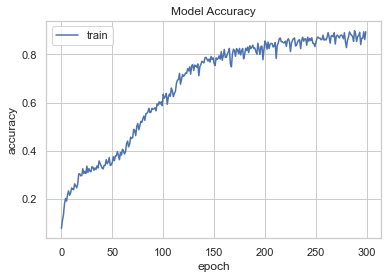

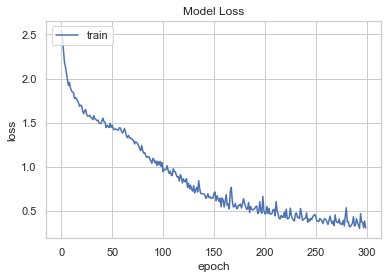

In [9]:
##########################
# # get model accuracy # #
##########################
plt.plot(history.history['accuracy'])
plt.title('Model Accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train'], loc='upper left')
plt.show()

######################
# # get model loss # #
######################
plt.plot(history.history['loss'])
plt.title('Model Loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train'], loc='upper left')
plt.show()

#### SAVE MODEL

In [10]:
##################
# # save model # #
##################
model.model.save(MODEL_PATH)

# LIVE TESTING
> Live test with new dataset to check if model function as it should

#### LOAD MODEL

In [24]:
##################
# # load model # #
##################

# model = create_model()
model = load_model(MODEL_PATH)

#### LOAD DATA
- Import new dataset to verify the model is able to predict accurately

In [25]:
# import unseen data
pred_df = pd.read_csv(ACTUAL_DATASET_PATH)
pred_df.head()
# pred_df = df_drop(pred_df)

,Subject,Password,T2-D|0,T2-I|0+1,T2-PF|0+1,T2-RF|0+1,T2-NG|0+1,T2-D|1,T2-I|1+2,T2-PF|1+2,T2-RF|1+2,T2-NG|1+2,T2-D|2,T2-I|2+3,T2-PF|2+3,T2-RF|2+3,T2-NG|2+3,T2-D|3,T2-I|3+4,T2-PF|3+4,T2-RF|3+4,T2-NG|3+4,T2-D|4,T2-I|4+5,T2-PF|4+5,T2-RF|4+5,T2-NG|4+5,T2-D|5,T2-I|5+6,T2-PF|5+6,T2-RF|5+6,T2-NG|5+6,T2-D|6,T2-I|6+7,T2-PF|6+7,T2-RF|6+7,T2-NG|6+7,T2-D|7,T2-D|S,T2-I|S,T2-PF|S,T2-RF|S,T2-NG|S,T2-D|M,T2-I|M,T2-PF|M,T2-RF|M,T2-DT-M,T2-D|VAR,T2-I|VAR,T2-PF|VAR,T2-RF|VAR,T2-DT-VAR,T2-D|SD,T2-I|SD,T2-PF|SD,T2-RF|SD,T2-NG|SD,T3-I|0+2,T3-PF|0+2,T3-RF|0+2,T3-NG|0+2,T3-I|1+3,T3-PF|1+3,T3-RF|1+3,T3-NG|1+3,T3-I|2+4,T3-PF|2+4,T3-RF|2+4,T3-NG|2+4,T3-I|3+5,T3-PF|3+5,T3-RF|3+5,T3-NG|3+5,T3-I|4+6,T3-PF|4+6,T3-RF|4+6,T3-NG|4+6,T3-I|5+7,T3-PF|5+7,T3-RF|5+7,T3-NG|5+7,T3-I|S,T3-PF|S,T3-RF|S,T3-NG|S,T3-I|M,T3-PF|M,T3-RF|M,T3-NG|M,T3-I|VAR,T3-PF|VAR,T3-RF|VAR,T3-NG|VAR,T3-I|SD,T3-PF|SD,T3-RF|SD,T3-NG|SD,T4-I|0+3,T4-PF|0+3,T4-RF|0+3,T4-NG|0+3,T4-I|1+4,T4-PF|1+4,T4-RF|1+4,T4-NG|1+4,T4-I|2+5,T4-PF|2+5,T4-RF|2+5,T4-NG|2+5,T4-I|3+6,T4-PF|3+6,T4-RF|3+6,T4-NG|3+6,T4-I|4+7,T4-PF|4+7,T4-RF|4+7,T4-NG|4+7,T4-I|S,T4-PF|S,T4-RF|S,T4-NG|S,T4-I|M,T4-PF|M,T4-RF|M,T4-NG|M,T4-I|VAR,T4-PF|VAR,T4-RF|VAR,T4-NG|VAR,T4-I|SD,T4-PF|SD,T4-RF|SD,T4-NG|SD,T5-I|0+4,T5-PF|0+4,T5-RF|0+4,T5-NG|0+4,T5-I|1+5,T5-PF|1+5,T5-RF|1+5,T5-NG|1+5,T5-I|2+6,T5-PF|2+6,T5-RF|2+6,T5-NG|2+6,T5-I|3+7,T5-PF|3+7,T5-RF|3+7,T5-NG|3+7,T5-I|S,T5-PF|S,T5-RF|S,T5-NG|S,T5-I|M,T5-PF|M,T5-RF|M,T5-NG|M,T5-I|VAR,T5-PF|VAR,T5-RF|VAR,T5-NG|VAR,T5-I|SD,T5-PF|SD,T5-RF|SD,T5-NG|SD,T6-I|0+5,T6-PF|0+5,T6-RF|0+5,T6-NG|0+5,T6-I|1+6,T6-PF|1+6,T6-RF|1+6,T6-NG|1+6,T6-I|2+7,T6-PF|2+7,T6-RF|2+7,T6-NG|2+7,T6-I|S,T6-PF|S,T6-RF|S,T6-NG|S,T6-I|M,T6-PF|M,T6-RF|M,T6-NG|M,T6-I|VAR,T6-PF|VAR,T6-RF|VAR,T6-NG|VAR,T6-I|SD,T6-PF|SD,T6-RF|SD,T6-NG|SD,T7-I|0+6,T7-PF|0+6,T7-RF|0+6,T7-NG|0+6,T7-I|1+7,T7-PF|1+7,T7-RF|1+7,T7-NG|1+7,T7-I|S,T7-PF|S,T7-RF|S,T7-NG|S,T7-I|M,T7-PF|M,T7-RF|M,T7-NG|M,T7-I|VAR,T7-PF|VAR,T7-RF|VAR,T7-NG|VAR,T7-I|SD,T7-PF|SD,T7-RF|SD,T7-NG|SD,T8-I|0+7,T8-PF|0+7,T8-RF|0+7,T8-NG|0+7
0,andy,dEcisi0n,0.112628,0.079001,0.191629,0.189652,0.302280,0.110651,0.057247,0.167898,0.146393,0.257044,0.089146,0.056419,0.145565,0.158604,0.247750,0.102185,0.044784,0.146969,0.169310,0.271495,0.124527,-0.045218,0.079309,0.043676,0.168202,0.088894,0.327517,0.416411,0.440134,0.529028,0.112617,-0.011089,0.101528,0.054103,0.166720,0.065192,0.805840,0.508661,1.249309,1.201873,1.942520,0.100730,0.072666,0.178473,0.171696,0.277503,0.000355,0.014530,0.012455,0.017236,0.014906,0.018849,0.120540,0.111601,0.131286,0.122092,0.246899,0.359527,0.336045,0.448673,0.202812,0.313463,0.304997,0.415648,0.203387,0.292533,0.327914,0.417060,0.124092,0.226277,0.212986,0.315171,0.371193,0.495719,0.483810,0.608336,0.429045,0.517939,0.494237,0.583131,1.577429,2.205460,2.159989,2.788020,0.262905,0.367577,0.359998,0.464670,0.013202,0.013524,0.011918,0.012390,0.114898,0.116292,0.109170,0.111309,0.392464,0.505092,0.494649,0.607277,0.349780,0.460432,0.474307,0.584958,0.282696,0.371842,0.371590,0.460736,0.540503,0.642688,0.653120,0.755305,0.472721,0.597248,0.537913,0.662440,2.038165,2.577302,2.531579,3.070716,0.407633,0.515460,0.506316,0.614143,0.010269,0.011659,0.010465,0.011673,0.101338,0.107979,0.102301,0.108042,0.539433,0.652061,0.663960,0.776587,0.429089,0.539740,0.517983,0.628634,0.699107,0.788253,0.811724,0.900870,0.642031,0.744216,0.707223,0.809408,2.309660,2.724270,2.700890,3.115500,0.577415,0.681068,0.675222,0.778875,0.014143,0.012097,0.014836,0.012798,0.118922,0.109987,0.121803,0.113126,0.618741,0.731369,0.707635,0.820263,0.845500,0.956151,0.958117,1.068768,0.800635,0.889781,0.865827,0.954973,2.264876,2.577302,2.531579,2.844004,0.754959,0.859101,0.843860,0.948001,0.014420,0.013338,0.016047,0.015475,0.120082,0.115489,0.126678,0.124399,1.035152,1.147780,1.147769,1.260397,0.947028,1.057679,1.012220,1.122871,1.982180,2.205460,2.159989,2.383269,0.991090,1.102730,1.079995,1.191634,0.003883,0.004059,0.009187,0.009457,0.062313,0.063711,0.095848,0.097245,1.136681,1.249309,1.20187

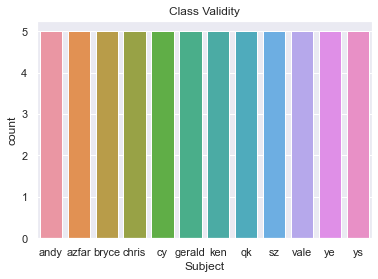

In [26]:
################################
# # check for class validity # #
################################
sns.set_theme(style="darkgrid")
ax = sns.countplot(x="Subject", data=pred_df).set_title("Class Validity")

# remove missing values if available
pred_df = pred_df.dropna()

In [27]:
pred_dataset = pred_df.values
results = pred_dataset[:,CLASSES_COL_NUM]

# # divide data into features X
# pred_row = pred_dataset[:,3:].astype(float)

########################
# # predict all rows # #
########################
pred_row=pred_df.iloc[:,FEATURES_COL_NUM:]

#################################
# # predict more than one row # #
#################################

# pred_row=pred_df.iloc[46:54,FEATURES_COL_NUM:]
# print(pred_row)

############################
# # predict a single row # #
############################

# pred_row=pred_df.iloc[11:12,FEATURES_COL_NUM:]

##################
# # shape data # #
##################
pred_row = pred_row.values.tolist()
pred_arr = np.asarray(pred_row, dtype=np.float32)
pred_arr = np.reshape(pred_arr, (pred_arr.shape[0], TIMESTEPS, pred_arr.shape[1]))

Y = CLASS_LIST
print(Y)
Y = np.asarray(Y)
Y = Y.reshape(-1, 1)
lb = LabelBinarizer().fit(Y)
Y = lb.transform(Y)

['andy', 'azfar', 'bryce', 'chris', 'cy', 'gerald', 'ken', 'qk', 'sz', 'vale', 'ye', 'ys']


In [28]:
####################################
# # get prediction and its label # #
####################################

pred_proba = model.predict(pred_arr)

# pred_proba = np.sum(pred_proba, axis=0)
# pred_proba = np.reshape(pred_proba, (1, 9))

pred = lb.inverse_transform(pred_proba)
acc = np.max(pred_proba, axis=1)

pred_results = np.column_stack((pred, acc))
pred_results = np.column_stack((results, pred_results))

pd.set_option('display.max_rows', None)
pd.set_option('display.max_columns', None)

df = pd.DataFrame(data=pred_results, index=None, columns=['Results', 'Prediction', 'Accuracy'])
# df = pd.DataFrame(data=pred_results, index=None, columns=['Prediction', 'Accuracy'])
print(df)

# =IF(EXACT(B2, C2), "Match", "Nope")

df.to_csv(RESULT_NAME)

   Results Prediction    Accuracy
0     andy       andy    0.975579
1     andy       andy   0.9744418
2     andy       andy   0.9739439
3     andy       andy   0.9690893
4     andy       andy   0.9754833
5    azfar      azfar   0.8913001
6    azfar      azfar   0.8429772
7    azfar      azfar  0.89076513
8    azfar      chris  0.46672392
9    azfar      chris   0.8074221
10   bryce         cy   0.7150306
11   bryce      bryce   0.9425983
12   bryce      bryce  0.94184434
13   bryce      bryce   0.8214919
14   bryce      bryce   0.9388618
15   chris      chris  0.43119973
16   chris      chris  0.80732894
17   chris      chris    0.807287
18   chris      chris   0.8022468
19   chris      chris   0.5578151
20      cy         cy  0.82022697
21      cy         cy   0.8660573
22      cy         cy   0.8641271
23      cy         cy   0.8577295
24      cy         cy   0.8070994
25  gerald     gerald   0.4809165
26  gerald     gerald  0.54180014
27  gerald        ken   0.4169865
28  gerald    